# A Fundamental Example of Machine Learning
*by James Medaugh*

## Overview
The goal of this notebook is to demonstrate one of the most elementary possible examples of a machine learning implementation. In the interest of simplicity, the model will use linear regression to estimate one output variable based upon the value of one numeric input variable.  I will use a few well known libraries such as matplotlib for graphing, pandas for reading csv data, and few others, but the focus of this notebook should be the mathematics and visual representations.

## Scenario
The data we will use for this is a simple and silly example.  The only input variable, also called a feature, will be "number of explosions".  The output variable will be "James' rating of the film" with values ranging from 0 to 10.  The dataset contains records 50 fictious films.  It is also worth mentioning that the movie rating precision is egregiously specific (e.g. 6.025596752 movie rating out of 10).  Pretend for the sake of the example that I actually care to be that precise about how much I like a movie.

   **Independent Variable (X)** - # of explosions in a film
   
   **Dependent Variable (Y)** - James' rating of film
   
   **Model** - Linear Regression
   
   **Optimization Method** - Batch Gradient Descent
   

## Steps

First thing we need to do is get the data out of the CSV and into a python object.  Here I'm using Pandas to read the CSV file and sorting the data once it is read so it is easier to plot

In [1]:
import pandas as pd

data = pd.read_csv('movie_ratings.csv')
data = data.sort_values(by=['num_explosions'])

Next, we are going to use matplotlib to create a scatter plot.  We are graphing our X variable, number of explosions, against our Y variable James' movie rating.  I also added some axis scaling and labels.  Let's see if any patterns emerge...

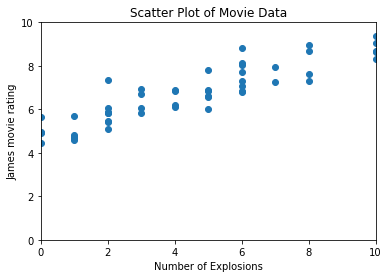

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.scatter(data['num_explosions'],data['james_movie_rating'])
plt.axis([0, 10, 0, 10])
plt.xlabel('Number of Explosions')
plt.ylabel('James'' movie rating' )
plt.title('Scatter Plot of Movie Data')
plt.show()

We can see there is a pretty obvious linear relationship here.  Our next goal is to draw a line that best matches the trend displayed on the graph.  This line has many names: regression line, line of best fit, trendline and perhaps others.  But while the line may have many names, it only has one universal equation:

$$y = mx + b$$

This becomes our model.  Our X variable of number of explosions times some value m plus some value b will let us estimate the movie rating.  But how do we find the correct values for m and b?  There are an infinte combination of values for m and b together that define an infinite number.  Enter the cost function.
    

## Cost Function - Scoring Your Model

When determining the regression line purely from a visual standpoint, it becomes clear that not all lines are created equal...

For example this line (m=.7, b= 3) is fairly close to most of the data points


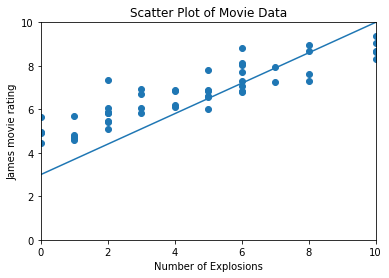

In [3]:
%matplotlib inline
import numpy as np

#Defines the trend line
m = .7
b = 3
linex = np.arange(0,11)        #list of number 0 to 10
liney = m*linex+b              #line equation

#Scatter Plot and Formatting
plt.scatter(data['num_explosions'],data['james_movie_rating'])
plt.axis([0, 10, 0, 10])
plt.xlabel('Number of Explosions')
plt.ylabel('James'' movie rating' )
plt.title('Scatter Plot of Movie Data')

#Adds trend line
plt.plot(linex,liney)
plt.show()

But this line (m= 10, b= -20) is no where close to matching all of the data points

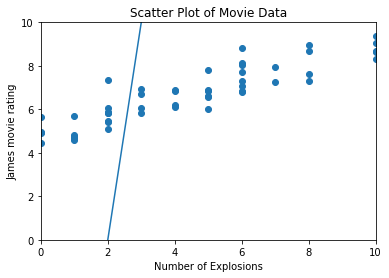

In [4]:
%matplotlib inline
import numpy as np

#Defines the trend line
m = 10
b = -20
linex = np.arange(0,11)        #list of number 0 to 10
liney = m*linex+b              #line equation

#Scatter Plot and Formatting
plt.scatter(data['num_explosions'],data['james_movie_rating'])
plt.axis([0, 10, 0, 10])
plt.xlabel('Number of Explosions')
plt.ylabel('James'' movie rating' )
plt.title('Scatter Plot of Movie Data')

#Adds trend line
plt.plot(linex,liney)
plt.show()

We know intuitively that the first example is a relatively good fit and the second example is a relatively bad fit.  However we need a way to empirically measure just how close or far the line is to the data points to quantify just how good or bad of a fit a line is.  We need a **cost function** that will inform us how close (or far-off) or model's estimates are.  For linear regression, this is accomplished by calculating the mean squared error.  The equation to calculate mean squared error is
$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

It looks intimidating at first, but if you unpack the expression into a plain english set of steps it is pretty easy and intuitive.
    
1. For each data point, find the difference between the actual value ($Y_i$) and the estimated value ($\hat{Y}_i$)
2. Square the difference of each to get rid of negative values (so they don't cancel out positive values)
3. Add all of these square together and divide by the number of data points.

Lets run through these calculation steps with a few data points from our explosions/movie rating data set.  We'll do one table for the "good line" (m= .7, b= 3) and one table for the "bad line" (m= 10, b= -20).  Note that we are getting our estimated Y value by simply plugging in our x, m and b values into the line equation $ y = mx + b $

#### Squared Errors for the "Good" Line

| X value | X in model eq. | Est. Y value | Actual Y value | Squared Error |
|---------|----------------|--------------|----------------|---------------|
|    5    | Y = .7 * 5 + 3 |      6.5     |     6.0256     |     0.225     |
|   10    | Y = .7 * 10 + 3|      10      |     8.6804     |     1.741     |
|    0    | Y = .7 * 0 + 3 |      3       |     4.9270     |     3.713     |
| ......  | ......         | do this      | 47 more times  | ......        |
| Total   |      .         |    .         |  .             |        73.2426|       

We still need to divide the total sum of squared error (73.2426) by the number of data points, which is 50.  This gives us a MSE value of roughly 1.465.  Now lets look at the bad line

#### Squared Errors for the "Bad" Line

| X value | X in model eq.  | Est. Y value | Actual Y value | Squared Error |
|---------|---------------- |--------------|----------------|---------------|
|    5    | Y = 10 * 5 - 20 |      30      |     6.0256     |     574.77    |
|   10    | Y = 10 * 10 - 20|      80      |     8.6804     |     5086.48   |
|    0    | Y = 10 * 0 - 20 |      -20     |     4.9270     |     621.36    |
| ......  | ......          | do this      | 47 more times  | ......        |
| Total   |      .          |    .         |  .             |       56007.79|

Dividing this total by our 50 data points, we get a MSE value of 1120.16.  Comparing this to the good line's MSE of 1.465, we can see that the bad line is a much worse match of the data and therefore does a much poorer job of predicting the movie rating.

Before moving on to the next section, let us write a quick python function that will calculate the MSE/cost for any combination of m and b for our data

In [5]:
def cost(data, m, b):
    #Initialize Mean Squared Error at zero
    MSE = 0
    
    #Loop through all 50 movie records
    for index, movie in data.iterrows():
        #Find difference between actual and estimate
        x = movie['num_explosions']
        estimate = m*x + b
        actual = movie['james_movie_rating']
        squared_error = (actual - estimate)**2 # <-- double asterix means exponent

        #Add to MSE total
        MSE += squared_error
        
    #Divide the final total by number of movies/datapoints
    MSE = MSE/(len(data))
    return MSE

#Check the function against our good and bad lines
print(cost(data, .7, 3)) #should be about 1.465
print(cost(data, 10, -20)) #should be about 1120.16

1.4648511114896996
1120.1557535446818


We already know our cost function is mean squared error.  Now we know that a good line has a relatively low mean squared error and that a bad line has a relatively high mean squared error.  We can extend this concept to assert that the best trend line (and therefore, best prediction model for this scenario) will have the lowest possible mean squared error.  So now it is just a matter of finding the m and b values that minimize the mean squared error for this particular data set.

## Graphing Cost Function and Gradient Descent

A key concept in machine learning is hyperparameter optimization.  Like most things in machine learning, the name is far more daunting than reality.  A hyperparameter is just some variable that defines a model.  In our linear regression model we have two hyperparameters: m and b.  So when we say we need to "optimize our hyperparameters", what we really mean is "find the values of m and b that give us our best fit line".  Not so scary after all.

<IPython.core.display.Javascript object>


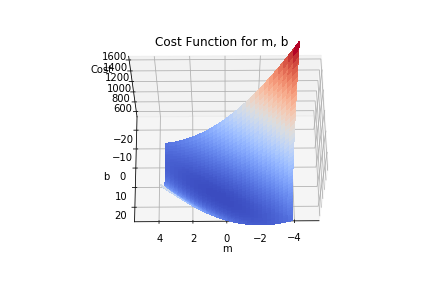

In [9]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as pp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np


m = np.arange(-4, 4, 0.25)
b = np.arange(-20, 21, 0.25)
M, B = np.meshgrid(m, b)
Z = cost(data, M, B)

fig = pp.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(M, B, Z, cmap = cm.coolwarm, 
                      linewidth=0, antialiased=False)

ax.axis([-10,10,-50,50])
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Cost Function for m, b')

pp.show()